<a href="https://colab.research.google.com/github/otluiz/Transfer_Learning/blob/master/Covid_19_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
tf.__version__

In [ ]:
!gdown https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [9]:
path = "/content/gdrive/My Drive/Covid_Data_GradientCrescent.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close() 

In [19]:
image = tf.keras.preprocessing.image.load_img(r'/content/two/train/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', target_size=(224,224))

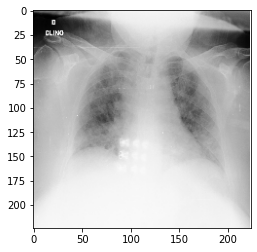

In [20]:
plt.imshow(image);

In [21]:
image = tf.keras.preprocessing.image.load_img(r'/content/two/train/normal/NORMAL2-IM-1281-0001.jpeg', target_size=(224,224))

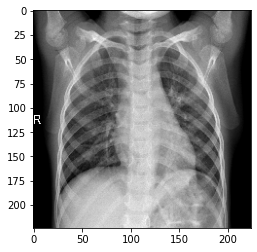

In [22]:
plt.imshow(image);

In [23]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   rotation_range=50,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [24]:
train_generator = train_datagen.flow_from_directory('/content/two/train',
                                                    target_size = (244,244),
                                                    batch_size = 16,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 130 images belonging to 2 classes.


In [26]:
step_size_train = train_generator.n // train_generator.batch_size # duas barras arredonda o números
step_size_train

8

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [27]:
test_generator = train_datagen.flow_from_directory('/content/two/test',
                                                    target_size = (244,244),
                                                    batch_size = 16,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 18 images belonging to 2 classes.


In [29]:
step_size_test = test_generator.n // test_generator.batch_size
step_size_test

1